In [1]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px
import random

In [2]:
random.seed(10)

In [3]:
pd.set_option('max_colwidth', 115)

In [4]:
OHCO = ['movie_id','scene_id', 'sent_num', 'token_num']
SENTS = OHCO[:3]
SCENES = OHCO[:2]
MOVIES = OHCO[:1]

In [5]:
LIB = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/LIB.csv', index_col='movie_id')
CORPUS = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/CORPUS.csv').set_index(OHCO)
VOCAB = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/VOCAB.csv', index_col = 'term_str')

### Define BAG

In [6]:
BAG = ['movie_id', 'scene_id']

In [7]:
DOCS = CORPUS\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [8]:
# word2vec parameters
w2v_params = dict(
    window = 2,
    min_count = 50,
    vector_size = 256
)

In [9]:
CORPUS

pos_tuple  pos token_str  \
movie_id scene_id sent_num token_num                                     
0        1        0        0            ('Dark', 'NNP')  NNP      Dark   
                           1              ('and', 'CC')   CC       and   
                           2          ('dormant', 'JJ')   JJ   dormant   
                           3               ('as', 'IN')   IN        as   
                           4                ('a', 'DT')   DT         a   
...                                                 ...  ...       ...   
36       111      0        10         ('beyond.', 'NN')   NN   beyond.   
                  1        0            ('FADE', 'NNP')  NNP      FADE   
                           1            ('OUT:', 'NNP')  NNP      OUT:   
                           2             ('THE', 'NNP')  NNP       THE   
                           3              ('END', 'NN')   NN       END   

                                     term_str  
movie_id scene_id sent_num token_num           
0        1        0        0             dark  
                           1              and  
                           2          dormant  
                           3               as  
                           4                a  
...                                       ...  
36       111      0        10          beyond  
                  1        0             fade  
                           1              out  
                           2              the  
                           3              end  

[839073 rows x 4 columns]

In [10]:
LIB

movie_title  \
movie_id                                             
0                                           aliens   
1                                   americanpsycho   
2                            buffythevampireslayer   
3                                     dragmetohell   
4                                eightleggedfreaks   
5                                 finaldestination   
6                                   freddyvs.jason   
7         fridaythe13thpartviiijasontakesmanhattan   
8                                        ghostship   
9                                      gingersnaps   
10                                        gremlins   
11                                       grudgethe   
12                 halloweenthecurseofmichaelmyers   
13                                        hannibal   
14                              houseof1000corpses   
15                                       insidious   
16                         interviewwiththevampire   
17                                          jasonx   
18                                   jennifersbody   
19                                    jurassicpark   
20                                          legion   
21                                       manhunter   
22                                 mulhollanddrive   
23                                        mummythe   
24             nightmareonelmstreetthefinalchapter   
25                                          orphan   
26                                     petsematary   
27                                           ringu   
28                                          scream   
29                                      shiningthe   
30                                           signs   
31                               silenceofthelambs   
32                                    silverbullet   
33                                   sixthsensethe   
34                                         slither   
35                                        thingthe   
36                              whenastrangercalls   

                                                                                                            source_file_path  \
movie_id                                                                                                                       
0             /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/aliens.txt   
1         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/americanpsy...   
2         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/buffythevam...   
3         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/dragmetohel...   
4         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/eightlegged...   
5         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/finaldestin...   
6         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/freddyvs.ja...   
7         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/fridaythe13...   
8          /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/ghostship.txt   
9         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/gingersnaps...   
10          /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/gremlins.txt   
11         /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/grudgethe.txt   
12        /Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/halloweenth...   
13          

## Create 1980s Corpus, Vocab, and DOCS

In [11]:
CORPUS_1980 = CORPUS.loc[[0, 7, 10, 21, 26, 29, 32, 35]]

In [12]:
CORPUS_1980 = CORPUS_1980.reset_index()

In [13]:
CORPUS_1980

movie_id  scene_id  sent_num  token_num          pos_tuple  pos  \
0              0         1         0          0    ('Dark', 'NNP')  NNP   
1              0         1         0          1      ('and', 'CC')   CC   
2              0         1         0          2  ('dormant', 'JJ')   JJ   
3              0         1         0          3       ('as', 'IN')   IN   
4              0         1         0          4        ('a', 'DT')   DT   
...          ...       ...       ...        ...                ...  ...   
186822        35       174         1         10    ('wind.', 'NN')   NN   
186823        35       174         2          0    ('FADE', 'NNP')  NNP   
186824        35       174         2          1    ('OUT:', 'NNP')  NNP   
186825        35       174         2          2     ('THE', 'NNP')  NNP   
186826        35       174         2          3      ('END', 'NN')   NN   

       token_str term_str  
0           Dark     dark  
1            and      and  
2        dormant  dormant  
3             as       as  
4              a        a  
...          ...      ...  
186822     wind.     wind  
186823      FADE     fade  
186824      OUT:      out  
186825       THE      the  
186826       END      end  

[186827 rows x 8 columns]

In [14]:
VOCAB_1980 = CORPUS_1980.term_str.value_counts().to_frame('n').sort_index()
VOCAB_1980.index.name = 'term_str'
VOCAB_1980['n_chars'] = VOCAB_1980.index.str.len()
VOCAB_1980['p'] = VOCAB_1980.n / VOCAB_1980.n.sum()
VOCAB_1980['i'] = -np.log2(VOCAB_1980.p)
VOCAB_1980['pos_group'] = CORPUS_1980[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB_1980['n_pos'] = CORPUS[['term_str','pos']].value_counts().unstack().count(1)

In [15]:
VOCAB_1980

n  n_chars         p          i pos_group  n_pos
term_str                                                    
0           9        1  0.000048  14.339502        CD      3
0000        1        4  0.000005  17.509427        CD      1
000i12i12   1        9  0.000005  17.509427        CD      1
0830        1        4  0.000005  17.509427        CD      1
0930        1        4  0.000005  17.509427        CD      1
...        ..      ...       ...        ...       ...    ...
zonked      1        6  0.000005  17.509427       VBN      1
zoo         1        3  0.000005  17.509427        NN      1
zoom        3        4  0.000016  15.924465       NNP      3
zooming     1        7  0.000005  17.509427       VBG      1
zooms      11        5  0.000059  14.049995       NNP      3

[13345 rows x 6 columns]

In [16]:
CORPUS_1980 = CORPUS_1980.set_index(OHCO)

In [17]:
DOCS_1980 = CORPUS_1980\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS_1980 = [doc for doc in DOCS_1980 if len(doc) > 1] # Lose single word docs

In [18]:
CORPUS_1980.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/CORPUS_1980.csv')

In [19]:
VOCAB_1980.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/VOCAB_1980.csv')

## Create 1990s Corpus, Vocab, and DOCS

In [20]:
CORPUS_1990 = CORPUS.loc[[2, 12, 16, 19, 23, 24, 27, 28, 31, 33]]

In [21]:
CORPUS_1990 = CORPUS_1990.reset_index()

In [22]:
CORPUS_1990

movie_id  scene_id  sent_num  token_num          pos_tuple  pos  \
0              2         1         0          0      ('We', 'PRP')  PRP   
1              2         1         0          1     ('see', 'VBP')  VBP   
2              2         1         0          2       ('an', 'DT')   DT   
3              2         1         0          3  ('Italian', 'JJ')   JJ   
4              2         1         0          4  ('village', 'NN')   NN   
...          ...       ...       ...        ...                ...  ...   
236470        33        92       119          0     ('FADE', 'NN')   NN   
236471        33        92       119          1      ('TO', 'NNP')  NNP   
236472        33        92       119          2  ('BLACK:', 'NNP')  NNP   
236473        33        92       119          3     ('THE', 'NNP')  NNP   
236474        33        92       119          4      ('END', 'NN')   NN   

       token_str term_str  
0             We       we  
1            see      see  
2             an       an  
3        Italian  italian  
4        village  village  
...          ...      ...  
236470      FADE     fade  
236471        TO       to  
236472    BLACK:    black  
236473       THE      the  
236474       END      end  

[236475 rows x 8 columns]

In [23]:
VOCAB_1990 = CORPUS_1990.term_str.value_counts().to_frame('n').sort_index()
VOCAB_1990.index.name = 'term_str'
VOCAB_1990['n_chars'] = VOCAB_1990.index.str.len()
VOCAB_1990['p'] = VOCAB_1990.n / VOCAB_1990.n.sum()
VOCAB_1990['i'] = -np.log2(VOCAB_1990.p)
VOCAB_1990['pos_group'] = CORPUS_1990[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB_1990['n_pos'] = CORPUS[['term_str','pos']].value_counts().unstack().count(1)

In [24]:
VOCAB_1990

n  n_chars         p          i pos_group  n_pos
term_str                                                   
063522     1        6  0.000004  17.850138        CD      1
0800       2        4  0.000008  16.850138        CD      1
1         26        1  0.000110  13.149698       NNP     11
10         9        2  0.000038  14.680213        CD      4
10000      3        5  0.000013  16.265175        CD      1
...       ..      ...       ...        ...       ...    ...
zone       3        4  0.000013  16.265175        NN      2
zoo        4        3  0.000017  15.850138        NN      1
zoom       1        4  0.000004  17.850138       NNP      3
zooms      6        5  0.000025  15.265175       NNS      3
zouuu      1        5  0.000004  17.850138        NN      1

[14308 rows x 6 columns]

In [25]:
CORPUS_1990 = CORPUS_1990.set_index(OHCO)

In [26]:
DOCS_1990 = CORPUS_1990\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS_1990 = [doc for doc in DOCS_1990 if len(doc) > 1] # Lose single word docs

In [27]:
CORPUS_1990.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/CORPUS_1990.csv')

In [28]:
VOCAB_1990.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/VOCAB_1990.csv')

## Create 2000s Corpus, Vocab, and DOCS

In [29]:
CORPUS_2000 = CORPUS.loc[[1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, 20, 22, 25, 30, 34, 36]]

In [30]:
CORPUS_2000 = CORPUS_2000.reset_index()

In [31]:
CORPUS_2000

movie_id  scene_id  sent_num  token_num             pos_tuple  pos  \
0              1         1         0          0          ('An', 'DT')   DT   
1              1         1         0          1    ('insanely', 'RB')   RB   
2              1         1         0          2   ('expensive', 'JJ')   JJ   
3              1         1         0          3  ('restaurant', 'NN')   NN   
4              1         1         0          4          ('on', 'IN')   IN   
...          ...       ...       ...        ...                   ...  ...   
415766        36       111         0         10     ('beyond.', 'NN')   NN   
415767        36       111         1          0       ('FADE', 'NNP')  NNP   
415768        36       111         1          1       ('OUT:', 'NNP')  NNP   
415769        36       111         1          2        ('THE', 'NNP')  NNP   
415770        36       111         1          3         ('END', 'NN')   NN   

         token_str    term_str  
0               An          an  
1         insanely    insanely  
2        expensive   expensive  
3       restaurant  restaurant  
4               on          on  
...            ...         ...  
415766     beyond.      beyond  
415767        FADE        fade  
415768        OUT:         out  
415769         THE         the  
415770         END         end  

[415771 rows x 8 columns]

In [32]:
VOCAB_2000 = CORPUS_2000.term_str.value_counts().to_frame('n').sort_index()
VOCAB_2000.index.name = 'term_str'
VOCAB_2000['n_chars'] = VOCAB_2000.index.str.len()
VOCAB_2000['p'] = VOCAB_2000.n / VOCAB_2000.n.sum()
VOCAB_2000['i'] = -np.log2(VOCAB_2000.p)
VOCAB_2000['pos_group'] = CORPUS_2000[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB_2000['n_pos'] = CORPUS[['term_str','pos']].value_counts().unstack().count(1)

In [33]:
VOCAB_2000

n  n_chars         p          i pos_group  n_pos
term_str                                                    
0          23        1  0.000055  14.138181        CD      3
000         1        3  0.000002  18.661743        CD      1
003559      1        6  0.000002  18.661743        CD      1
01          1        2  0.000002  18.661743        CD      1
01s         3        3  0.000007  17.076781       NNP      1
...        ..      ...       ...        ...       ...    ...
zulu        1        4  0.000002  18.661743        CD      1
zurbarans   1        9  0.000002  18.661743       NNP      1
zydeco      2        6  0.000005  17.661743        NN      1
zzzzt       1        5  0.000002  18.661743       NNP      1
zzzzzzt     1        7  0.000002  18.661743        NN      1

[19957 rows x 6 columns]

In [34]:
CORPUS_2000 = CORPUS_2000.set_index(OHCO)

In [35]:
DOCS_2000 = CORPUS_2000\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS_2000 = [doc for doc in DOCS_2000 if len(doc) > 1] # Lose single word docs

In [36]:
CORPUS_2000.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/CORPUS_2000.csv')

In [37]:
VOCAB_2000.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/VOCAB_2000.csv')

# Generate word embeddings with Gensim's library

In [38]:
model_1980 = word2vec.Word2Vec(DOCS_1980, **w2v_params)

In [39]:
model_1990 = word2vec.Word2Vec(DOCS_1990, **w2v_params)

In [40]:
model_2000 = word2vec.Word2Vec(DOCS_2000, **w2v_params)

In [41]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

# Visualize 1980s with tSNE

## Get model coordinates to plot

In [42]:
coords_1980 = pd.DataFrame(
    dict(
        vector = [model_1980.wv.get_vector(w) for w in model_1980.wv.key_to_index], 
        term_str = model_1980.wv.key_to_index.keys()
    )).set_index('term_str')

## Use ScikitLearn's TSNE library

In [43]:
tsne_engine = TSNE(perplexity=20, n_components=2, init='random', n_iter=1000, random_state=42, learning_rate=200)
tsne_model_1980 = tsne_engine.fit_transform(coords_1980.vector.to_list())

In [44]:
coords_1980['x'] = tsne_model_1980[:,0]
coords_1980['y'] = tsne_model_1980[:,1]

## Add some vocab features 

In [45]:
if coords_1980.shape[1] == 3:
    coords_1980 = coords_1980.merge(VOCAB_1980.reset_index(), on='term_str')
    coords_1980 = coords_1980.set_index('term_str')
    
coords_1980 = coords_1980.query("pos_group == 'NN' | pos_group == 'NNS' | pos_group.str.startswith('VB')")

In [46]:
coords_1980.head()

vector  \
term_str                                                                                                                       
is        [-0.12948592, -0.1736598, -0.04553012, 0.011544288, -0.01818022, 0.080163464, 0.15640134, -0.14198339, 0.075300...   
are       [-0.08057204, -0.16378978, -0.08685716, 0.01819469, 0.037167117, 0.081349485, 0.1325198, -0.15702696, 0.0338985...   
door      [-0.24405159, -0.059469223, 0.15615746, 0.0135008, -0.14807908, -0.14875616, 0.47772628, 0.039135057, 0.1098997...   
looks     [-0.17185476, -0.15138252, 0.09371593, -0.007763461, -0.047610197, -0.033900496, 0.31442195, -0.044976626, 0.09...   
have      [0.03100044, -0.24127279, -0.2367918, -0.043548003, 0.17284454, 0.16281515, -0.012650957, -0.18055591, -0.00314...   

                  x          y     n  n_chars         p         i pos_group  \
term_str                                                                      
is        12.464163   5.995448  1984        2  0.010634  6.555231       VBZ   
are       13.930646  13.565850   833        3  0.004465  7.807254       VBP   
door     -45.603924 -10.340191   589        4  0.003157  8.307303        NN   
looks    -39.034725 -20.419724   573        5  0.003071  8.347036       VBZ   
have       2.103674  48.033165   480        4  0.002573  8.602536       VBP   

          n_pos  
term_str         
is            9  
are           8  
door          8  
looks         9  
have          6

## Plot the coordinates

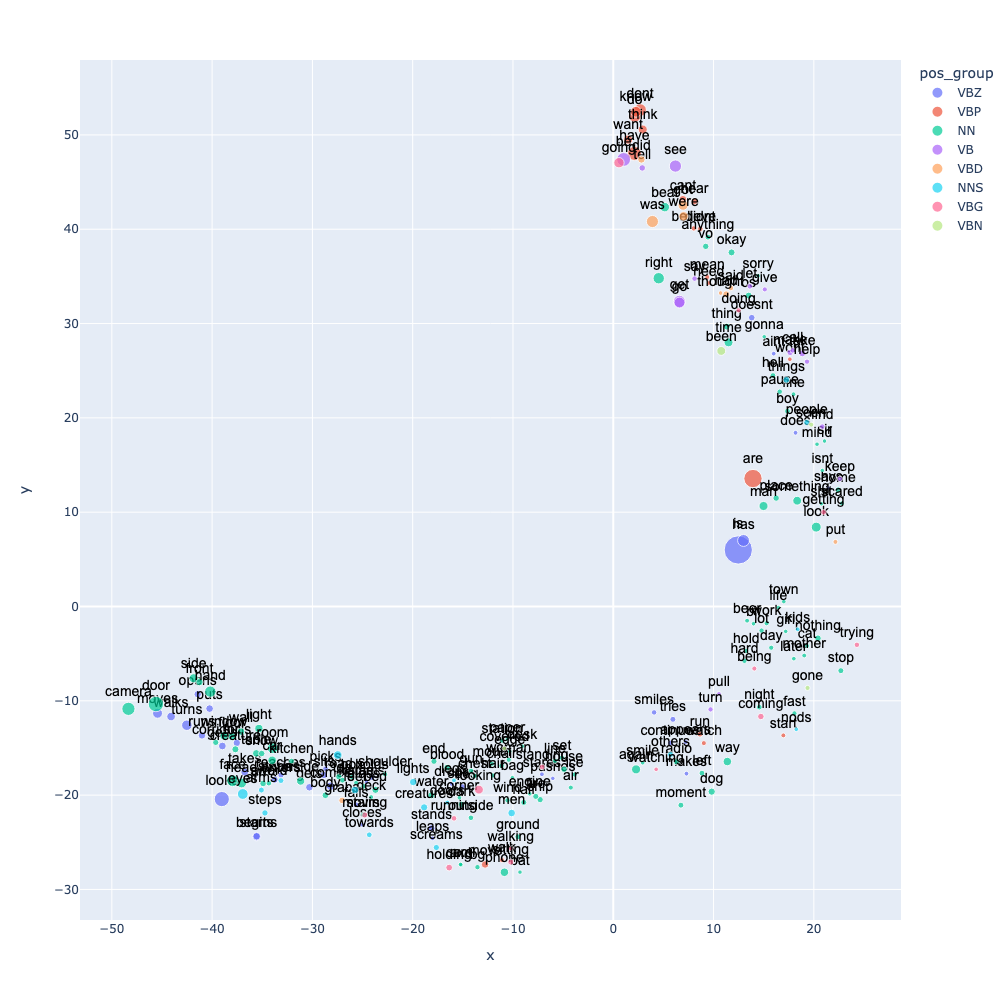

In [47]:
px.scatter(coords_1980.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',
           size = 'n',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

# Visualize 1990s with tSNE

## Get model coordinates to plot

In [48]:
coords_1990 = pd.DataFrame(
    dict(
        vector = [model_1990.wv.get_vector(w) for w in model_1990.wv.key_to_index], 
        term_str = model_1990.wv.key_to_index.keys()
    )).set_index('term_str')

## Use ScikitLearn's TSNE library

In [49]:
#tsne_engine = TSNE(perplexity=20, n_components=2, init='random', n_iter=1000, random_state=42, learning_rate=200)
tsne_model_1990 = tsne_engine.fit_transform(coords_1990.vector.to_list())

In [50]:
coords_1990['x'] = tsne_model_1990[:,0]
coords_1990['y'] = tsne_model_1990[:,1]

## Add some vocab features 

In [51]:
if coords_1990.shape[1] == 3:
    coords_1990 = coords_1990.merge(VOCAB_1990.reset_index(), on='term_str')
    coords_1990 = coords_1990.set_index('term_str')
    
coords_1990 = coords_1990.query("pos_group == 'NN' | pos_group == 'NNS' | pos_group.str.startswith('VB')")

In [52]:
coords_1990.head()

vector  \
term_str                                                                                                                       
is        [0.029887252, -0.042860236, -0.0889247, 0.066933885, 0.24692498, 0.040210266, 0.15863244, -0.12710574, -0.06206...   
are       [0.009604453, -0.09935507, -0.2191631, 0.05748776, 0.32348332, 0.034518663, 0.13708489, -0.19154255, -0.0271804...   
looks     [0.15511563, -0.29171658, 0.25795805, 0.18510824, -0.049180172, 0.13006066, 0.11903353, 0.023433441, 0.09144074...   
door      [0.023964899, -0.10296894, 0.21975613, 0.1523962, -0.06485026, 0.24734665, 0.27771395, 0.087080166, -0.07219594...   
be        [0.05617139, -0.16439039, -0.42830494, 0.067199275, 0.46967068, -0.053237543, 0.18884146, -0.17699403, -0.15635...   

                  x          y     n  n_chars         p         i pos_group  \
term_str                                                                      
is        15.459119  30.245962  2319        2  0.009815  6.670851       VBZ   
are      -32.786640   3.391460   899        3  0.003805  8.037961       VBP   
looks      9.888494 -31.430918   771        5  0.003263  8.259551       VBZ   
door      24.693523 -42.714283   634        4  0.002683  8.541799        NN   
be       -45.323460 -18.076120   588        2  0.002489  8.650466        VB   

          n_pos  
term_str         
is            9  
are           8  
looks         9  
door          8  
be            8

## Plot the coordinates

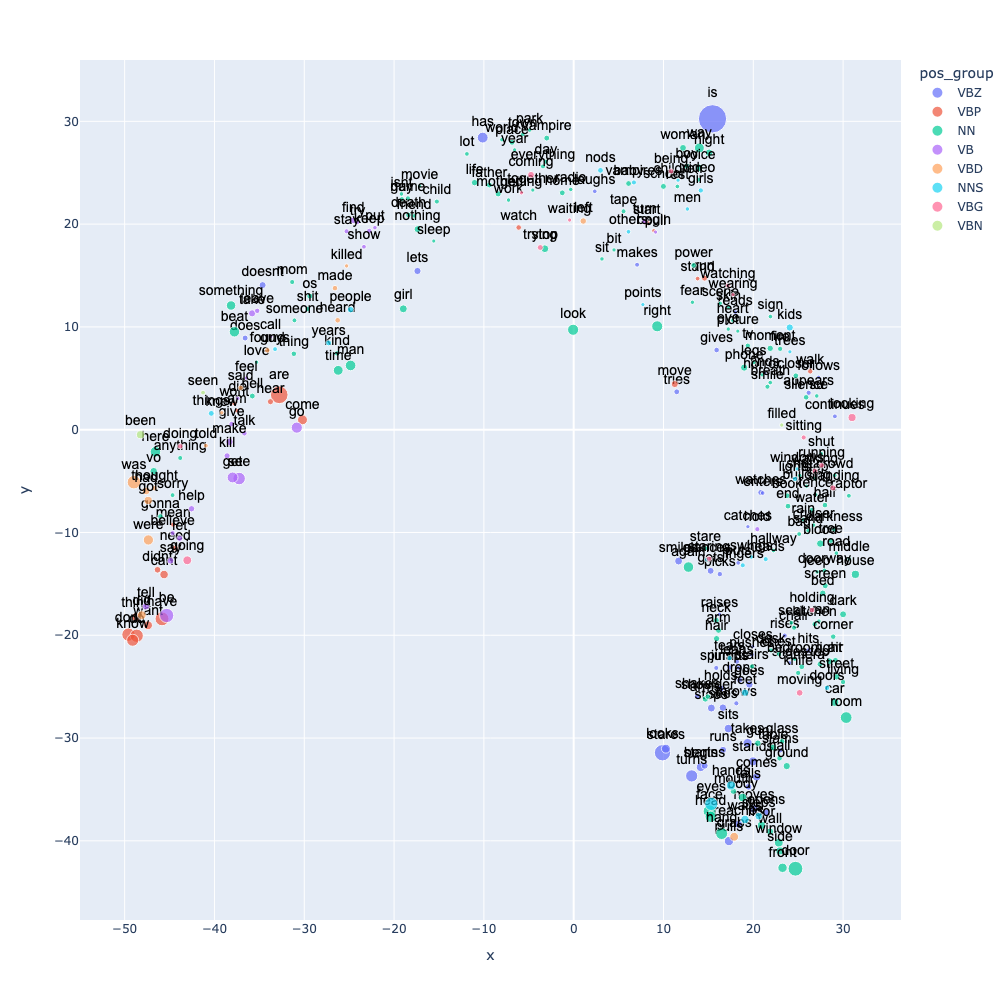

In [53]:
px.scatter(coords_1990.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',
           size = 'n',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

# Visualize 2000s with tSNE

## Get model coordinates to plot

In [54]:
coords_2000 = pd.DataFrame(
    dict(
        vector = [model_2000.wv.get_vector(w) for w in model_2000.wv.key_to_index], 
        term_str = model_2000.wv.key_to_index.keys()
    )).set_index('term_str')

## Use ScikitLearn's TSNE library

In [55]:
#tsne_engine = TSNE(perplexity=20, n_components=2, init='random', n_iter=1000, random_state=42, learning_rate=200)
tsne_model_2000 = tsne_engine.fit_transform(coords_2000.vector.to_list())

In [56]:
coords_2000['x'] = tsne_model_2000[:,0]
coords_2000['y'] = tsne_model_2000[:,1]

## Add some vocab features 

In [57]:
if coords_2000.shape[1] == 3:
    coords_2000 = coords_2000.merge(VOCAB_2000.reset_index(), on='term_str')
    coords_2000 = coords_2000.set_index('term_str')
    
coords_2000 = coords_2000.query("pos_group == 'NN' | pos_group == 'NNS' | pos_group.str.startswith('VB')")

In [58]:
coords_2000.head()

vector  \
term_str                                                                                                                       
is        [-0.16398111, 0.10356217, 0.23147102, -0.08751052, -0.07137258, 0.15806901, 0.14298695, -0.32859826, 0.50730366...   
are       [-0.20047125, -0.3616277, 0.3366512, 0.2044327, -0.18178457, 0.21645649, 0.17973365, -0.32906163, 0.28233925, 0...   
looks     [0.6008616, 0.17111813, -0.33269545, 0.6955684, -0.041711204, 0.024306891, 0.13436855, -0.49616128, 0.07624236,...   
door      [-0.2789238, 0.040314253, -0.17696941, -0.11691522, 0.08475131, -0.35572013, 0.45403945, 0.27621678, -0.0427357...   
see       [-0.13594334, -0.32048926, 0.04888491, -0.0661986, -0.30912492, -0.15465283, 0.15071861, -0.22010513, -0.239948...   

                  x          y     n  n_chars         p         i pos_group  \
term_str                                                                      
is       -25.155807   6.483680  4409        2  0.010632  6.555508       VBZ   
are      -48.705288 -18.617182  1588        3  0.003829  8.028748       VBP   
looks     49.479805   6.714329  1294        5  0.003120  8.324121       VBZ   
door      26.157181  48.276806  1255        4  0.003026  8.368272        NN   
see      -55.699314  -2.611582  1158        3  0.002792  8.484324        VB   

          n_pos  
term_str         
is            9  
are           8  
looks         9  
door          8  
see           8

## Plot the coordinates

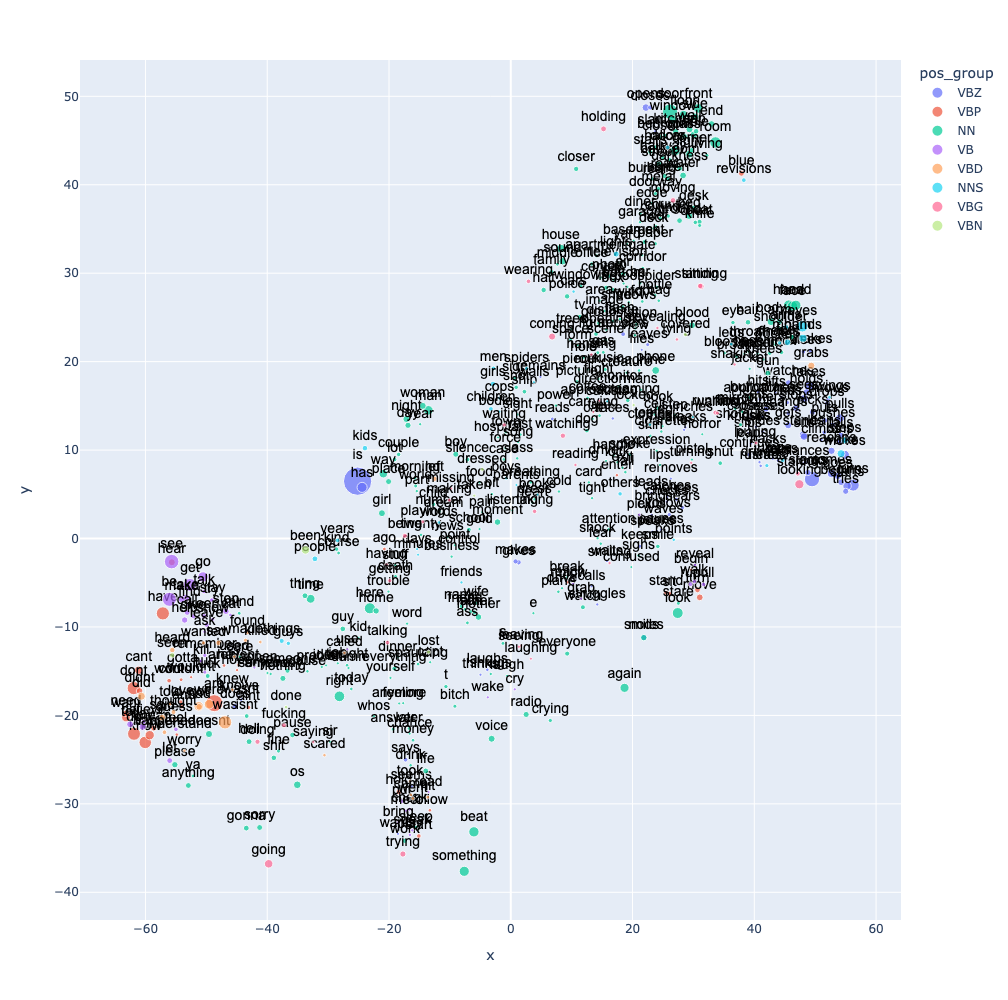

In [59]:
px.scatter(coords_2000.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',
           size = 'n',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

# Visualize all Movies with tSNE

## Get model coordinates to plot

In [60]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index], 
        term_str = model.wv.key_to_index.keys()
    )).set_index('term_str')

## Use ScikitLearn's TSNE library

In [61]:
tsne_engine = TSNE(perplexity=20, n_components=2, init='random', n_iter=1000, random_state=42, learning_rate=200)
tsne_model = tsne_engine.fit_transform(coords.vector.to_list())

In [62]:
tsne_engine

TSNE(init='random', learning_rate=200, perplexity=20, random_state=42)

In [63]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

## Add some vocab features 

In [64]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')
    
coords = coords.query("max_pos == 'NN' | max_pos == 'NNS' | max_pos.str.startswith('VB')")

In [65]:
coords.head()

vector  \
term_str                                                                                                                       
is        [0.36525485, -0.27874422, 0.21984613, 0.46721408, -0.4726935, -0.02366615, 0.057009548, -0.42772385, 0.21323521...   
are       [0.48505187, 0.019374147, 0.008348973, 1.235643, -0.27208734, 0.23188272, 0.18914719, -0.17598858, 0.66575193, ...   
looks     [0.5076664, 0.52740264, -0.38760966, 0.37013808, 0.1354044, -0.086793214, 0.15181261, -0.5906621, -0.09480151, ...   
door      [-0.13560161, -0.34601238, -0.14365862, -0.08404036, -0.24498715, 0.14275791, 0.33586857, 0.6787193, -0.1744007...   
be        [0.09848686, 0.09725054, -0.05960606, 0.758077, -0.53209835, 0.38083708, -0.3247324, -0.76458335, -0.67958885, ...   

                  x          y     n  n_chars         p         i max_pos  \
term_str                                                                    
is         5.427977  47.819931  8712        2  0.010401  6.587122     VBZ   
are       11.653560  47.064499  3320        3  0.003964  7.978943     VBP   
looks    -17.903173 -61.792919  2638        5  0.003149  8.310682     VBZ   
door      42.619427 -43.684811  2478        4  0.002958  8.400950      NN   
be        12.658319  70.818405  2153        2  0.002570  8.603778      VB   

          n_pos                                                      cat_pos  \
term_str                                                                       
is            9   {'NN', 'VBD', 'NNP', 'VBZ', 'VB', 'VBP', 'IN', 'RB', 'JJ'}   
are           8         {'NN', 'NNP', 'VBZ', 'VB', 'IN', 'VBP', 'JJ', 'NNS'}   
looks         9  {'NN', 'VBD', 'NNP', 'VBZ', 'VB', 'VBP', 'RB', 'JJ', 'NNS'}   
door          8         {'NN', 'NNP', 'VBZ', 'VB', 'VBP', 'CD', 'JJ', 'NNS'}   
be            8        {'NN', 'VBD', 'NNP', 'VB', 'VBP', 'WDT', 'JJ', 'NNS'}   

          stop stem_porter stem_snowball stem_lancaster     tfidf        dfidf  
term_str                                                                        
is           1          is            is             is  0.240964  2694.012237  
are          1         are           are             ar  0.295034  2978.143901  
looks        0        look          look           look  0.325915  2885.359792  
door         0        door          door           door  0.461476  2733.742259  
be           1          be            be             be  0.323567  2746.052497

## Plot the coordinates

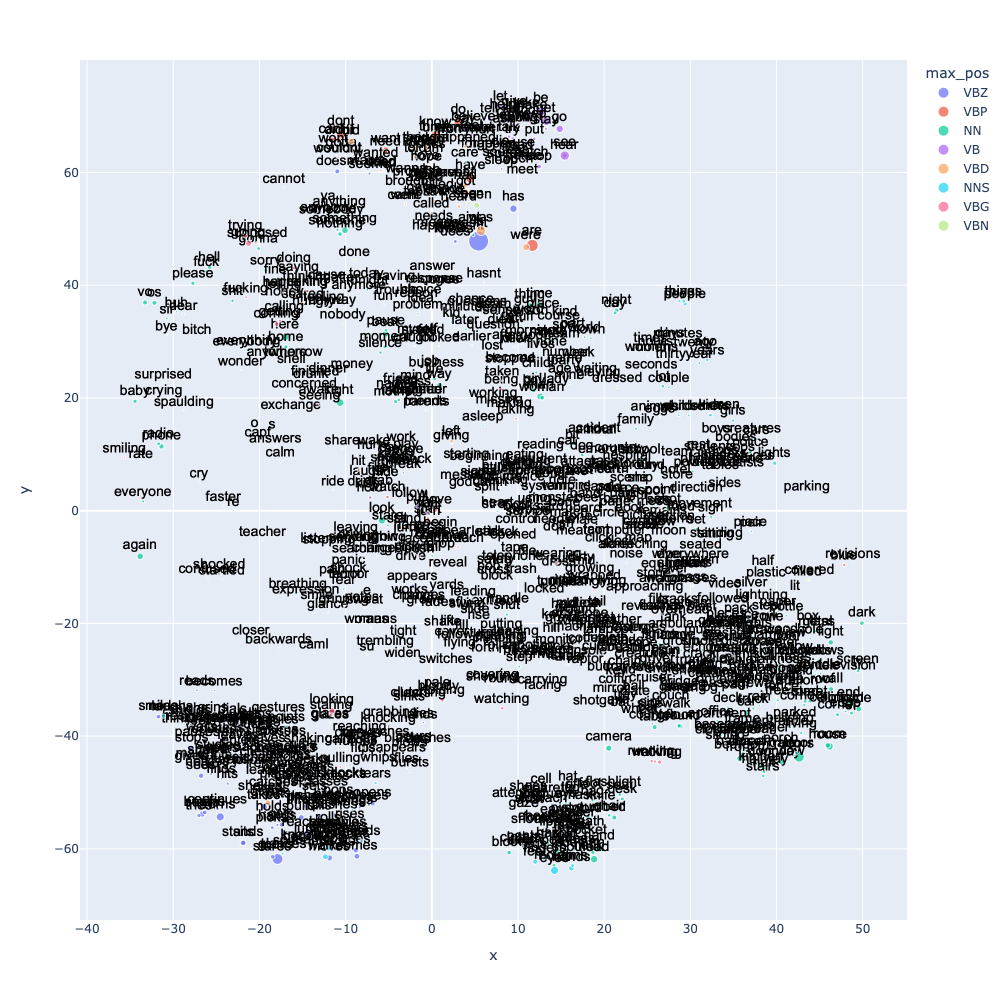

In [66]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',
           size = 'n',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

## 80s Analogies

$A : B :: C : D? \rightarrow B - A + C = D$


In [67]:
VOCAB_1980[VOCAB_1980['pos_group'] == 'NN'].sort_values('n', ascending=False).head(25)

n  n_chars         p          i pos_group  n_pos
term_str                                                     
door       589        4  0.003157   8.307303        NN      8
camera     434        6  0.002326   8.747876        NN      5
face       342        4  0.001833   9.091575        NN      8
right      322        5  0.001726   9.178510        NN     10
hand       319        4  0.001710   9.192014        NN      7
room       280        4  0.001501   9.380144        NN      6
look       245        4  0.001313   9.572789        NN     10
head       240        4  0.001286   9.602536        NN      8
beat       222        4  0.001190   9.715011        NN     15
side       208        4  0.001115   9.808987        NN      7
again      205        5  0.001099   9.829947        NN     12
man        204        3  0.001093   9.837002        NN     11
time       198        4  0.001061   9.880070        NN     11
something  192        9  0.001029   9.924465        NN     12
car        180        3  0.000965  10.017574        NN      6
way        179        3  0.000959  10.025611        NN      7
phone      179        5  0.000959  10.025611        NN      9
inside     169        6  0.000906  10.108548        NN     10
light      167        5  0.000895  10.125723        NN      9
window     165        6  0.000884  10.143105        NN      9
floor      152        5  0.000815  10.261500        NN      5
table      142        5  0.000761  10.359680        NN      6
wall       142        4  0.000761  10.359680        NN      6
front      136        5  0.000729  10.421964        NN      6
dog        130        3  0.000697  10.487059        NN      6

In [68]:
def complete_analogy_1980(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model_1980.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None

In [69]:
complete_analogy_1980('man', 'scared', 'woman')

term       sim
0  axe  0.993931
1   bg  0.993912

In [70]:
complete_analogy_1980('woman', 'scared', 'man')

term       sim
0  just  0.995129
1  that  0.994066

In [71]:
complete_analogy_1980('he', 'cut', 'her')

term       sim
0  wendy  0.868457
1   jack  0.860198

In [72]:
complete_analogy_1980('night', 'scared', 'day')

term       sim
0   keep  0.997219
1  kevin  0.996705

## 90s Analogies

$A : B :: C : D? \rightarrow B - A + C = D$

In [73]:
VOCAB_1990[VOCAB_1990['pos_group'] == 'NN'].sort_values('n', ascending=False).head(25)

n  n_chars         p          i pos_group  n_pos
term_str                                                     
door       634        4  0.002683   8.541799        NN      8
face       467        4  0.001976   8.982859        NN      8
hand       415        4  0.001756   9.153170        NN      7
room       400        4  0.001693   9.206282        NN      6
head       365        4  0.001545   9.338385        NN      8
look       357        4  0.001511   9.370358        NN     10
right      355        5  0.001502   9.378463        NN     10
man        327        3  0.001384   9.496991        NN     11
here       323        4  0.001367   9.514748        NN     13
again      322        5  0.001363   9.519221        NN     12
beat       316        4  0.001337   9.546357        NN     15
way        289        3  0.001223   9.675212        NN      7
time       279        4  0.001181   9.726017        NN     11
something  258        9  0.001092   9.838911        NN     12
front      254        5  0.001075   9.861453        NN      6
window     223        6  0.000944  10.049238        NN      9
body       212        4  0.000897  10.122218        NN      7
house      192        5  0.000813  10.265175        NN      7
floor      190        5  0.000804  10.280282        NN      5
car        188        3  0.000796  10.295549        NN      6
side       188        4  0.000796  10.295549        NN      7
girl       183        4  0.000775  10.334438        NN      7
stop       176        4  0.000745  10.390706        NN      8
night      168        5  0.000711  10.457821        NN     11
voice      164        5  0.000694  10.492586        NN     10

In [74]:
def complete_analogy_1990(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model_1990.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None

In [75]:
complete_analogy_1990('man', 'fear', 'woman')

term       sim
0  coles  0.996985
1  spins  0.996608

In [76]:
complete_analogy_1990('woman', 'fear', 'man')

term       sim
0    girl  0.991567
1  theres  0.989967

In [77]:
complete_analogy_1990('vampire', 'man', 'woman')

term       sim
0    only  0.963400
1  little  0.960718

In [78]:
complete_analogy_1990('night', 'fear', 'day')

term       sim
0  nods  0.990803
1  anna  0.989762

## 2000s Analogies

$A : B :: C : D? \rightarrow B - A + C = D$

In [79]:
VOCAB_2000[VOCAB_2000['pos_group'] == 'NN'].sort_values('n', ascending=False).head(25)

n  n_chars         p          i pos_group  n_pos
term_str                                                      
door       1255        4  0.003026   8.368272        NN      8
room        712        4  0.001717   9.186010        NN      6
here        687        4  0.001657   9.237577        NN     13
look        661        4  0.001594   9.293237        NN     10
right       629        5  0.001517   9.364827        NN     10
hand        604        4  0.001456   9.423339        NN      7
face        594        4  0.001432   9.447424        NN      8
beat        587        4  0.001415   9.464527        NN     15
head        577        4  0.001391   9.489316        NN      8
something   570        9  0.001374   9.506925        NN     12
car         555        3  0.001338   9.545399        NN      6
front       510        5  0.001230   9.667390        NN      6
man         499        3  0.001203   9.698847        NN     11
again       458        5  0.001104   9.822540        NN     12
time        430        4  0.001037   9.913550        NN     11
way         405        3  0.000977   9.999965        NN      7
house       398        5  0.000960  10.025119        NN      7
floor       389        5  0.000938  10.058117        NN      5
window      385        6  0.000928  10.073029        NN      9
phone       340        5  0.000820  10.252352        NN      9
light       339        5  0.000817  10.256602        NN      9
body        338        4  0.000815  10.260864        NN      7
os          324        2  0.000781  10.321893        NN      8
side        322        4  0.000776  10.330826        NN      7
table       309        5  0.000745  10.390280        NN      6

In [80]:
def complete_analogy_2000(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model_2000.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None

In [81]:
complete_analogy_2000('man', 'scared', 'woman')

term       sim
0  wydell  0.942357
1    capt  0.930380

In [82]:
complete_analogy_2000('woman', 'scared', 'man')

term       sim
0      dad  0.940166
1  kimball  0.938697

In [83]:
complete_analogy_2000('man', 'car', 'woman')

term       sim
0    doors  0.923108
1  kitchen  0.921113

In [84]:
complete_analogy_2000('woman', 'car', 'man')

term       sim
0   group  0.894251
1  ground  0.887336